In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install scikit-ntk

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.manifold import TSNE
import csv
from collections import Counter, defaultdict
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import gensim
import gensim.downloader
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from skntk import NeuralTangentKernel as NTK
import ast



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/preprocessed_data.csv') # replace 'your_file.csv' with the path to your CSV file
df = df.dropna(subset=['preprocessed_joke', 'joke_type'])

# Assuming x = col1 and y = col2
X = df['preprocessed_joke']
y = df['joke_type']


# Step 3: Initialize and apply TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_tf = vectorizer.fit_transform(X)



In [34]:
from sklearn.decomposition import TruncatedSVD

# Define the number of components (desired dimensionality)
n_components = 300  # Adjust this parameter based on your needs

# Initialize TruncatedSVD
svd = TruncatedSVD(n_components=n_components, random_state=42)

# Fit and transform the training data
X_tf_svd = svd.fit_transform(X_tf)

df_X_tf_svd = pd.DataFrame(X_tf_svd, columns=[f"component_{i}" for i in range(n_components)])
df_X_tf_svd.to_csv('X_tf_svd.csv', index=False)

# Now X_train_tf_svd and X_test_tf_svd contain the reduced-dimensional representations of the TF-IDF vectors


In [35]:
# # Convert lists to numpy arrays
# X = np.array(X).reshape(-1, 1)  # Reshape to ensure X is a 2D array
# y = np.array(y)

# Split data into training and testing sets
X_train_tf, X_test_tf, y_train, y_test = train_test_split(X_tf_svd, y, test_size=0.3, random_state=40)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_tf)
X_test_scaled = scaler.transform(X_test_tf)

SVM

In [36]:


# Initialize SVM classifier with specific hyperparameters
svm = SVC(kernel='rbf')

# Train the SVM classifier
svm.fit(X_train_scaled, y_train)

# Predict labels for test set
y_pred = svm.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7627325404086612


In [37]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Calculate precision, recall, f1-score, and support for each class and overall
report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:\n", report)

# Calculate accuracy for each class
accuracy_per_class = {}
for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred[mask])

# Print accuracy for each class
print("\nAccuracy per class:")
for label, acc in accuracy_per_class.items():
    print(f"Class '{label}': {acc:.4f}")


Overall Accuracy: 0.7627325404086612
Classification Report:
               precision    recall  f1-score   support

           0     0.6456    0.8372    0.7290      1634
           1     0.7239    0.5820    0.6453      1658
           2     0.7011    0.6327    0.6652      1620
           3     1.0000    0.9988    0.9994      1646

    accuracy                         0.7627      6558
   macro avg     0.7677    0.7627    0.7597      6558
weighted avg     0.7681    0.7627    0.7599      6558


Accuracy per class:
Class '0': 0.8372
Class '1': 0.5820
Class '2': 0.6327
Class '3': 0.9988


In [38]:


# Initialize SVM classifier with specific hyperparameters
svm = SVC(kernel='poly')

# Train the SVM classifier
svm.fit(X_train_scaled, y_train)

# Predict labels for test set
y_pred = svm.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6306800853918878


In [39]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Calculate precision, recall, f1-score, and support for each class and overall
report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:\n", report)

# Calculate accuracy for each class
accuracy_per_class = {}
for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred[mask])

# Print accuracy for each class
print("\nAccuracy per class:")
for label, acc in accuracy_per_class.items():
    print(f"Class '{label}': {acc:.4f}")


Overall Accuracy: 0.6306800853918878
Classification Report:
               precision    recall  f1-score   support

           0     0.4345    0.9259    0.5915      1634
           1     0.7299    0.3878    0.5065      1658
           2     0.7491    0.3907    0.5136      1620
           3     0.9978    0.8183    0.8992      1646

    accuracy                         0.6307      6558
   macro avg     0.7278    0.6307    0.6277      6558
weighted avg     0.7283    0.6307    0.6280      6558


Accuracy per class:
Class '0': 0.9259
Class '1': 0.3878
Class '2': 0.3907
Class '3': 0.8183


# RF

In [41]:

# Initialize Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier
rf.fit(X_train_scaled, y_train)

# Predict labels for test set
y_pred = rf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7268984446477584


In [42]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Calculate precision, recall, f1-score, and support for each class and overall
report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:\n", report)

# Calculate accuracy for each class
accuracy_per_class = {}
for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred[mask])

# Print accuracy for each class
print("\nAccuracy per class:")
for label, acc in accuracy_per_class.items():
    print(f"Class '{label}': {acc:.4f}")


Overall Accuracy: 0.7268984446477584
Classification Report:
               precision    recall  f1-score   support

           0     0.6360    0.7142    0.6728      1634
           1     0.6681    0.5440    0.5997      1658
           2     0.6182    0.6537    0.6355      1620
           3     0.9873    0.9957    0.9915      1646

    accuracy                         0.7269      6558
   macro avg     0.7274    0.7269    0.7249      6558
weighted avg     0.7279    0.7269    0.7251      6558


Accuracy per class:
Class '0': 0.7142
Class '1': 0.5440
Class '2': 0.6537
Class '3': 0.9957


XG-B

In [43]:



# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softprob', use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the XGBoost classifier
xgb_clf.fit(X_train_scaled, y_train)

# Predict labels for test set
y_pred = xgb_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7422994815492528


In [44]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Calculate precision, recall, f1-score, and support for each class and overall
report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:\n", report)

# Calculate accuracy for each class
accuracy_per_class = {}
for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred[mask])

# Print accuracy for each class
print("\nAccuracy per class:")
for label, acc in accuracy_per_class.items():
    print(f"Class '{label}': {acc:.4f}")


Overall Accuracy: 0.7422994815492528
Classification Report:
               precision    recall  f1-score   support

           0     0.6589    0.7436    0.6987      1634
           1     0.6603    0.5838    0.6197      1658
           2     0.6531    0.6438    0.6484      1620
           3     0.9945    0.9976    0.9961      1646

    accuracy                         0.7423      6558
   macro avg     0.7417    0.7422    0.7407      6558
weighted avg     0.7421    0.7423    0.7409      6558


Accuracy per class:
Class '0': 0.7436
Class '1': 0.5838
Class '2': 0.6438
Class '3': 0.9976


KNN


In [45]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize k-NN classifier
knn_clf = KNeighborsClassifier(n_neighbors=9)  # You can adjust the number of neighbors (k) as needed

# Train the k-NN classifier
knn_clf.fit(X_train_scaled, y_train)

# Predict labels for test set
y_pred = knn_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6251906068923452


In [46]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Calculate precision, recall, f1-score, and support for each class and overall
report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:\n", report)

# Calculate accuracy for each class
accuracy_per_class = {}
for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred[mask])

# Print accuracy for each class
print("\nAccuracy per class:")
for label, acc in accuracy_per_class.items():
    print(f"Class '{label}': {acc:.4f}")


Overall Accuracy: 0.6251906068923452
Classification Report:
               precision    recall  f1-score   support

           0     0.4613    0.8017    0.5856      1634
           1     0.5749    0.4928    0.5307      1658
           2     0.6609    0.3790    0.4818      1620
           3     0.9934    0.8256    0.9018      1646

    accuracy                         0.6252      6558
   macro avg     0.6726    0.6248    0.6250      6558
weighted avg     0.6729    0.6252    0.6254      6558


Accuracy per class:
Class '0': 0.8017
Class '1': 0.4928
Class '2': 0.3790
Class '3': 0.8256


NTK


In [47]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Ensure X_train and y_train are numpy arrays
X_train = np.array(X_train_tf)
y_train = np.array(y_train)

# Check the length of the dataset
dataset_length = len(X_train)

# Ensure that the dataset contains at least 1000 elements
if dataset_length >= 1000:
    # Use stratified sampling to ensure class balance in the sampled subset
    X_train_subset, _, y_train_subset, _ = train_test_split(
        X_train, y_train, train_size=5000, stratify=y_train, random_state=42
    )

    # Initialize NTK kernel (this assumes you have the NTK implementation)
    kernel_ntk = NTK(depth=5)

    # Initialize SVM classifier with NTK kernel
    SVCClf = SVC(kernel=kernel_ntk)

    # Train the classifier
    SVCClf.fit(X_train_subset, y_train_subset)

    # Assuming X_test, y_test are your test data
    X_test = np.array(X_test_tf)
    y_test = np.array(y_test)

    # Make predictions
    y_pred = SVCClf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
else:
    print("Dataset does not contain enough elements for 1000 random jokes.")


Accuracy: 0.6777981091796279


In [48]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Calculate precision, recall, f1-score, and support for each class and overall
report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:\n", report)

# Calculate accuracy for each class
accuracy_per_class = {}
for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred[mask])

# Print accuracy for each class
print("\nAccuracy per class:")
for label, acc in accuracy_per_class.items():
    print(f"Class '{label}': {acc:.4f}")



Overall Accuracy: 0.6777981091796279
Classification Report:
               precision    recall  f1-score   support

           0     0.4880    0.8562    0.6216      1634
           1     0.7058    0.3878    0.5006      1658
           2     0.6747    0.4815    0.5620      1620
           3     0.9994    0.9860    0.9927      1646

    accuracy                         0.6778      6558
   macro avg     0.7170    0.6779    0.6692      6558
weighted avg     0.7175    0.6778    0.6694      6558


Accuracy per class:
Class '0': 0.8562
Class '1': 0.3878
Class '2': 0.4815
Class '3': 0.9860


TSNE

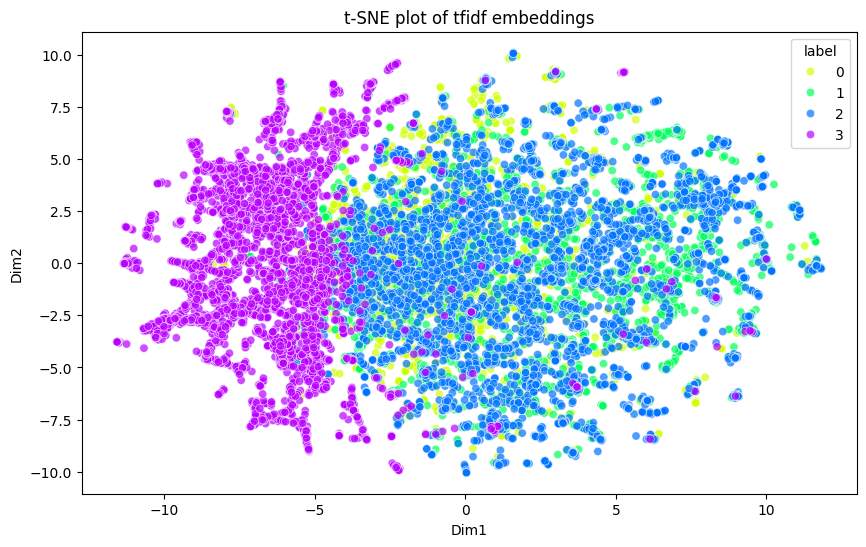

In [40]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data1 = pd.read_csv('/content/X_tf_svd.csv')  # Update with your file path
# Assuming your CSV file has columns for each GloVe embedding dimension, e.g., 'glove_1', 'glove_2', ..., 'glove_100'
# And a column named 'label' for the joke type

features = data1.iloc[:, 2:].values  # Adjust the column index if needed
labels = df['joke_type'].values  # Assuming 'joke_type' is the column name for labels


# Apply t-SNE
tsne_model = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
tsne_features = tsne_model.fit_transform(features)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_features, columns=['Dim1', 'Dim2'])
tsne_df['label'] = labels

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Dim1', y='Dim2',
    hue='label',
    palette=sns.color_palette("hsv", len(set(labels))),
    data=tsne_df,
    legend="full",
    alpha=0.7
)
plt.title('t-SNE plot of tfidf embeddings')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

import pandas as pd
# Load the dataset
data = pd.read_csv('/content/tfidf_jokes.csv')
data = data.dropna(subset=['preprocessed_joke'])
texts = data['preprocessed_joke'].values

# Compute TF-IDF features
tfidf_vectorizer = TfidfVectorizer()  # Adjust max_features as needed
tfidf_features = tfidf_vectorizer.fit_transform(texts)

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Number of features
num_features = len(feature_names)
print("Number of features:", num_features)


Number of features: 69021
